# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [10]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacoes_dic = cotacoes.json()
for moeda in cotacoes_dic:
    print(moeda)
    print(cotacoes_dic[moeda])

USD
{'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.4324', 'low': '5.3761', 'varBid': '-0.0149', 'pctChange': '-0.28', 'bid': '5.3903', 'ask': '5.3928', 'timestamp': '1643389876', 'create_date': '2022-01-28 14:11:16'}
USDT
{'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.56', 'low': '5.515', 'varBid': '-0.035', 'pctChange': '-0.63', 'bid': '5.36', 'ask': '5.69', 'timestamp': '1643389800', 'create_date': '2022-01-28 14:10:00'}
CAD
{'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.2531', 'low': '4.214', 'varBid': '-0.0151', 'pctChange': '-0.35', 'bid': '4.2268', 'ask': '4.2279', 'timestamp': '1643389876', 'create_date': '2022-01-28 14:11:16'}
GBP
{'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.2729', 'low': '7.214', 'varBid': '-0.0034', 'pctChange': '-0.05', 'bid': '7.2315', 'ask': '7.235', 'timestamp': '1643389889', 'create_dat

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [27]:
print('Dolar: {}'.format(cotacoes_dic['USD']['bid']))
print('Euro: {}'.format(cotacoes_dic['EUR']['bid']))
print('BitCoin: {}'.format(cotacoes_dic['BTC']['bid']))

Dolar: 5.3903
Euro: 6.0159
BitCoin: 201.8


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [43]:
cotacao_dolar_30 = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacao_dolar_30_dic = cotacao_dolar_30.json()

lista_cotacoes_dolar = [float(item['bid']) for item in cotacao_dolar_30_dic]
print(lista_cotacoes_dolar)

#for i, dia in enumerate(cotacao_dolar_30_dic):
    #print('{}'.format(cotacao_dolar_30_dic[i]['bid']))

[5.0358, 5.5458, 5.6753, 5.5679, 5.6133, 5.5892, 5.6639, 5.7075, 5.7071, 5.6315, 5.7729, 5.7819, 5.7561, 5.6491, 5.6211, 5.5214, 5.5602, 5.5832, 5.6244, 5.6156, 5.5518, 5.5357, 5.672, 5.8025, 5.8755, 5.6908, 5.6693, 5.6193, 5.6761, 5.6418]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [72]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/200?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()

lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)

[4.474, 4.5144, 4.5847, 4.6073, 4.6274, 4.6269, 4.7187, 4.6425, 4.814, 4.7985, 4.831, 4.858, 4.9949, 5.011, 5.1089, 5.0897, 5.0627, 5.0627, 5.1382, 5.0938, 5.0345, 5.0255, 5.099, 5.1007, 5.1931, 5.2045, 5.2518, 5.254, 5.351, 5.3491, 5.2848, 5.2237, 5.1189, 5.107, 5.1063, 5.2003, 5.1634, 5.2404, 5.2343, 5.2335, 5.3175, 5.3163, 5.4572, 5.5345, 5.5788, 5.59, 5.6531, 5.5039, 5.3348, 5.479, 5.4856, 5.5426, 5.5762, 5.711, 5.837, 5.7253, 5.8206, 5.8858, 5.8837, 5.8105, 5.8524, 5.8554, 5.7145, 5.7531, 5.6925, 5.5499, 5.5297, 5.5321, 5.4421, 5.3544, 5.2717, 5.403, 5.3365, 5.338, 5.363, 5.3665, 5.0632, 5.1174, 4.9614, 4.9585, 4.8186, 4.8998, 4.9712, 4.976, 5.0473, 5.0511, 5.1547, 5.244, 5.2287, 5.371, 5.3125, 5.3105, 5.2581, 5.1536, 5.3439, 5.3645, 5.4805, 5.484, 5.4032, 5.4633, 5.3172, 5.3616, 5.3108, 5.3158, 5.3529, 5.3811, 5.339, 5.3386, 5.3268, 5.3237, 5.3238, 5.4036, 5.3653, 5.3694, 5.331, 5.3891, 5.3842, 5.3329, 5.1725, 5.1191, 5.2122, 5.2288, 5.2304, 5.149, 5.1627, 5.17, 5.155, 5.222, 5.2

#### Gráfico com as cotações do BitCoin

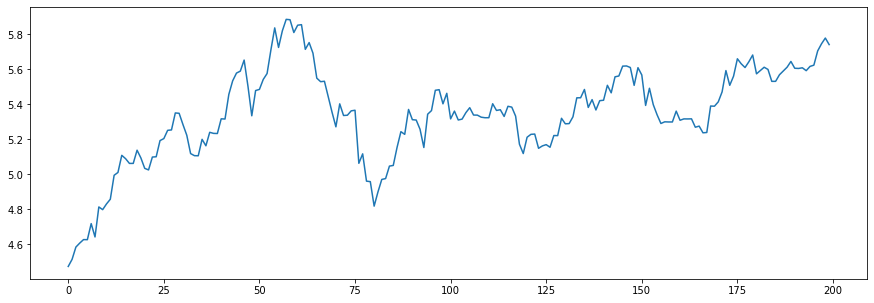

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)
plt.show()